# Desafío - Clasificación desde Machine Learning

## Descripción

En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:

* `default`: Variable binaria. Registra si el cliente entró en morosidad o no.
* `income`: Ingreso promedio declarado por el cliente.
* `balance`: Total de saldo en la cuenta de crédito.
* `student`: Variable binaria. Registra si el cliente es estudiante o no.


## Desafío 1: Preparación del ambiente de trabajo

* Importe los módulos básicos para el análisis de datos
* Importe `seaborn`
* Importe `statsmodels`
* Importe `LogisticRegression`, `train_test_split`, `StandardScaler`, `classification_report` y `roc_curve` de `sklearn`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (6,3)


#Regresión clasica
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf


#RegresiónLineal Machine 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Desafío 2: Análisis exploratorio

* Explore las principales relaciones entre las variables. Utilizando los métodos `boxplot` y `lmplot` de `seaborn` implemente los siguientes gráficos.
	* Un `boxplot` del balance total de las cuentas, segmentado por el status de estudiante.
	* Un `boxplot` del ingreso total de cada cliente, segmentado por el status de estudiante.
	* Un `boxplot` del `balance` total de las cuentas, segmentado por el status de default.
	* Un `boxplot` del ingreso total de cada cliente, segmentado por el status de default.
	* Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de estudiante.
	* Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de default.
* Comente brevemente sobre los principales patrones de comportamiento.
* tip: Puede utilizar el argumento `hue` en `lmplot` para identificar las observaciones por status.

In [2]:
df = pd.read_csv('default_credit.csv')
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
index      10000 non-null int64
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.7+ KB


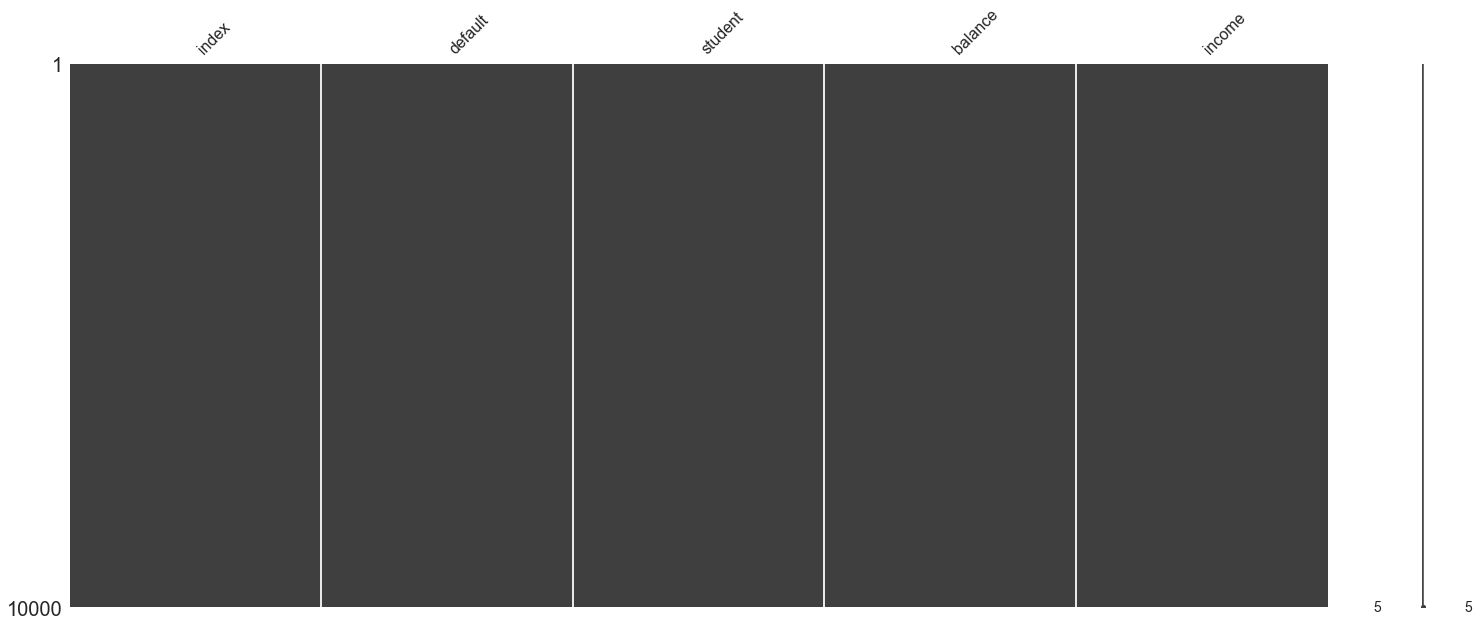

In [4]:
missingno.matrix(df)

* Un `boxplot` del balance total de las cuentas, segmentado por el status de estudiante.

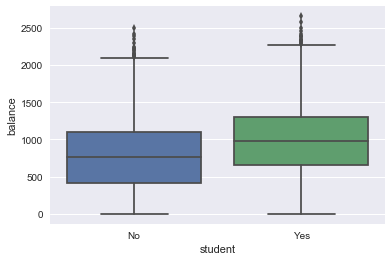

In [5]:
sns.boxplot(x=df['student'], y=df['balance'])

* Comente brevemente sobre los principales patrones de comportamiento:

Los estudiantes tienen en promedio mayor saldo en la cuenta de crédito que los que no son estudiantes

* Un `boxplot` del ingreso total de cada cliente, segmentado por el status de estudiante.

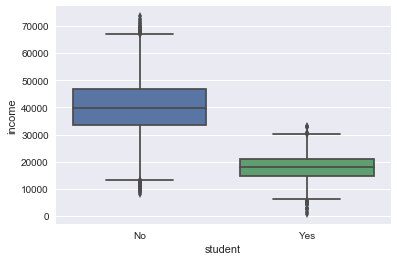

In [6]:
sns.boxplot(x=df['student'], y=df['income'])

* Comente brevemente sobre los principales patrones de comportamiento:

Claramente cuando se es estudiante se tienen menos ingresos que cuando ya estudias y te dedicas a trabajar.
La media de ingresos para no estudiantes es mucho mayor que la media de ingresos de estudiantes.

* Un `boxplot` del `balance` total de las cuentas, segmentado por el status de default.

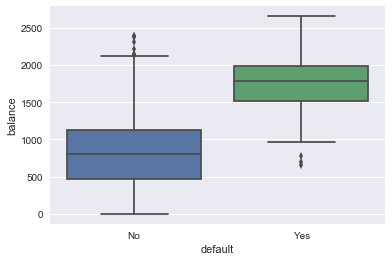

In [7]:
sns.boxplot(x=df['default'], y=df['balance'])

* Comente brevemente sobre los principales patrones de comportamiento:

Claramente al tener morosidad tu saldo en la cuenta de crédito es mayor.

* Un `boxplot` del ingreso total de cada cliente, segmentado por el status de default.

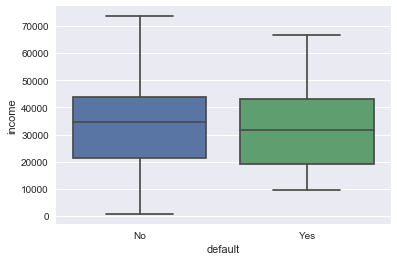

In [8]:
sns.boxplot(x=df['default'], y=df['income'])

* Comente brevemente sobre los principales patrones de comportamiento:

El hecho de tener morosidad no está influenciado por los ingresos de una persona, dado que ambas cajas son muy similares en tamaño. 

* Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de estudiante.

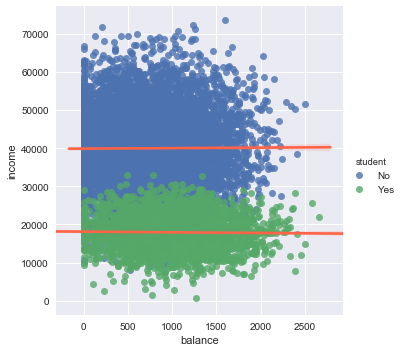

In [9]:
sns.lmplot(x='balance', y='income', hue='student', data=df, line_kws={'color': 'tomato'})

* Comente brevemente sobre los principales patrones de comportamiento:
    
Según el diagrama de dispersión entre `balance` e `income`, segmentado por el status del estudiante, podemos deducir
que las personas que no son estudiantes presentan mayores ingresos, debido a que la nuebe de datos
está más condensada.


* Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de default.

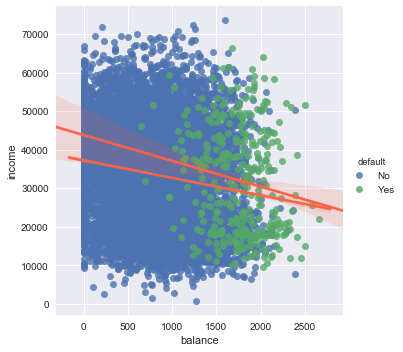

In [10]:
sns.lmplot(x='balance', y='income', hue='default', data=df, line_kws={'color': 'tomato'})

* Comente brevemente sobre los principales patrones de comportamiento:

Según el diagrama de dispersión entre `balance` e `income`, segmentado por el status default, podemos deducir
que las personas que no presentan morosidad representan la mayoria de los datos

## Desafío 3: Modelación econométrica

* Recodifique las variables `student` y `default` para que adquieran atributos numéricos.

In [11]:
df_copy = df.copy()

In [12]:
df_copy['default'] = np.where(df['default']=='Yes', 1, 0)

In [13]:
df_copy['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [14]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [15]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [16]:
df_copy['student'] = np.where(df['student']=='Yes', 1, 0)

In [17]:
df_copy['student'].value_counts()

0    7056
1    2944
Name: student, dtype: int64

* implemente el siguiente modelo econométrico: Un modelo de regresión Logística donde la variable dependiente
`default` depende de las variables independientes `balance`, `income`, y `student`

* A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevoel modelo y comente brevemente sobre el comportamiento de los atributos.

In [18]:
modelo_logit = smf.logit('default ~ balance + income + student', df_copy).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [19]:
modelo_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 29 Aug 2019   Pseudo R-squ.:                  0.4619
Time:                        21:57:37   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Según los resultados de mi modelo de Regresión Logística podemos decir que la variable `income` no es significativa,
por lo cual, podemos depurar nuestro modelo para no incluir esta variable.  El resto de variables independientes
si son significativas.

In [20]:
modelo_logit = smf.logit('default ~ balance + student', df_copy).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [21]:
modelo_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Aug 2019   Pseudo R-squ.:                  0.4619
Time:                        21:57:37   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Los modelos se mantuvieron similares al quitar la variable income.  La variable student mejoró un poco su efecto
en default.

## Desafío 4: Entrenar

A partir del modelo depurado, genere un modelo predictivo con las siguientes características:

* Estandarize la matriz de atributos.
* Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Implemente el modelo sin alterar los hiperparámetros.
* Genere la predicción de las clases y de la probabilidad.
* Reporte las métricas de precision, recall y f1 para ambas clases.
* Grafique la curva Receiver Operator Characteristic.
* En base a los pasos, comente sobre el desempeño predictivo del modelo.

In [22]:
df_copy.head()

,index,default,student,balance,income
0,1,0,0,729.526495,44361.625074
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138947
3,4,0,0,529.250605,35704.493935
4,5,0,0,785.655883,38463.495879


In [23]:
df_copy = df_copy.drop(['index'], axis=1)

In [24]:
df_copy.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [25]:
X_mat = df_copy.loc[:, 'student': 'balance']
X_mat_std = StandardScaler().fit_transform(X_mat)

/Users/luisalfredoporraspaez/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/luisalfredoporraspaez/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_mat_std,
                                                   df_copy['default'],
                                                   test_size=0.33,
                                                   random_state=11238)

In [27]:
modelo_logit_ml = LogisticRegression().fit(X_train, y_train)

/Users/luisalfredoporraspaez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
modelo_logit_ml.coef_

array([[-0.34815408,  2.56143656]])

In [29]:
modelo_logit_ml.intercept_

array([-5.79596441])

In [30]:
yhat = modelo_logit_ml.predict(X_test)

In [31]:
yhat[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* Reporte las métricas de precision, recall y f1 para ambas clases.

In [32]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3186
           1       0.76      0.32      0.45       114

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.87      0.66      0.72      3300
weighted avg       0.97      0.97      0.97      3300



* Grafique la curva Receiver Operator Characteristic.

In [33]:
yhat = modelo_logit_ml.predict_proba(X_test)[:, 1]

In [34]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

Text(0.5, 0, 'Falsos Positivos')

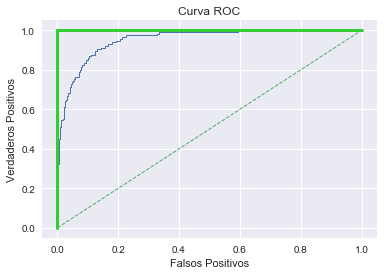

In [35]:
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls='--', lw=1)
plt.plot([0, 0], [1, 0], c='limegreen', lw=3), plt.plot([1, 1], c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

* En base a los pasos, comente sobre el desempeño predictivo del modelo.

In [36]:
roc_auc_score(y_test, yhat)

0.9532053611744364

Calculando el área bajo nuestra curva ROC nos arroja un 0.95, con lo cual nuestro modelo tiene un desempeño del 45%